In [2]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

In [3]:
df = pd.read_csv('Customers.csv') # read our data

df.dtypes # learn data types

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income ($)          int64
Spending Score (1-100)     int64
Profession                object
Work Experience            int64
Family Size                int64
dtype: object

In [4]:
df.head() # see our data points

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6


In [5]:
df = df.drop(['CustomerID','Profession'], axis=1) # drop impractical column 

In [6]:
df.describe()

,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,48.960000,110731.821500,50.962500,4.102500,3.768500
std,28.429747,45739.536688,27.934661,3.922204,1.970749
min,0.000000,0.000000,0.000000,0.000000,1.000000
25%,25.000000,74572.000000,28.000000,1.000000,2.000000
50%,48.000000,110045.000000,50.000000,3.000000,4.000000
75%,73.000000,149092.750000,75.000000,7.000000,5.000000
max,99.000000,189974.000000,100.000000,17.000000,9.000000


Time to start visualizaing our data

In [7]:
Gender = df['Gender']
Age = df['Age']


Gender.unique() # check gender inputs

array(['Male', 'Female'], dtype=object)

Text(0.5, 1.0, 'Age Distribution by Gender')

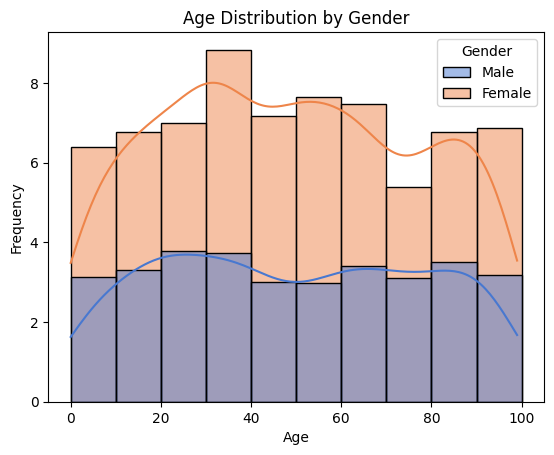

In [8]:

sns.histplot(x=df['Age'],hue=df['Gender'],binwidth=10,palette='muted',stat='frequency',kde=True) # plot our histogram

plt.title('Age Distribution by Gender') # change title


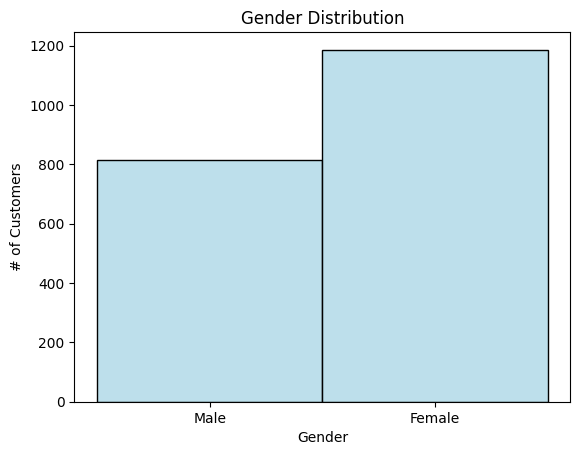

In [9]:
sns.histplot(data=df, x='Gender', stat='count', alpha=0.8, color='lightblue', edgecolor='black')

plt.xlabel('Gender')
plt.ylabel('# of Customers')

plt.title('Gender Distribution')

plt.show()

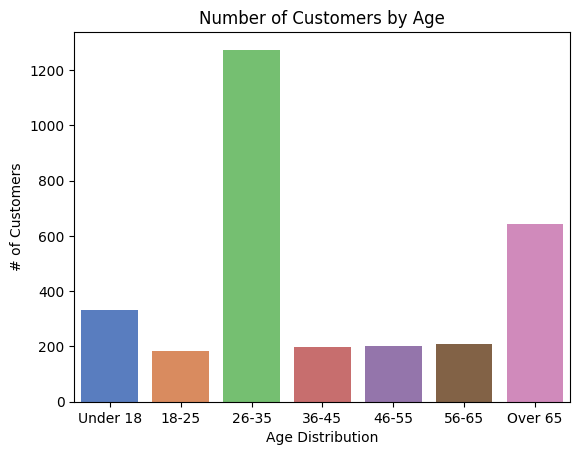

In [10]:
x = ['Under 18',
    '18-25', 
    '26-35',    
    '36-45',    
    '46-55',    
    '56-65',    
    'Over 65']


y = [len(df.loc[df['Age'] < 18]),
    len(df.loc[(df['Age'] >= 18) & (df['Age'] <= 25)]),
    len(df.loc[(df['Age'] > 25) & (df['Age'] >= 35)]),
    len(df.loc[(df['Age'] > 35) & (df['Age'] <= 45)]),
    len(df.loc[(df['Age'] > 45) & (df['Age'] <= 55)]),
    len(df.loc[(df['Age'] > 55) & (df['Age'] <= 65)]),
    len(df.loc[df['Age'] > 65])
]

sns.barplot(x=x,y=y,palette='muted',estimator=sum)

plt.xlabel('Age Distribution')
plt.ylabel('# of Customers')

plt.title('Number of Customers by Age')

plt.show()



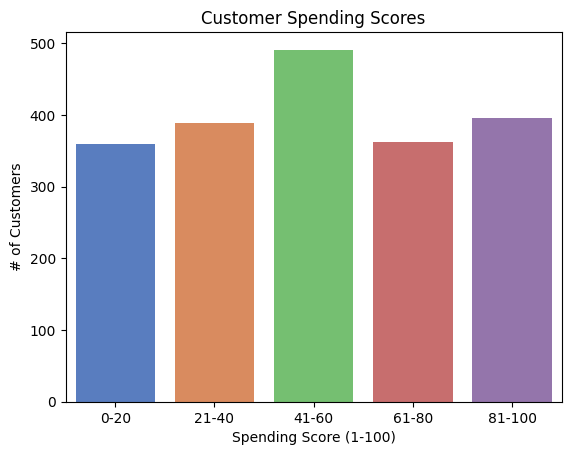

In [11]:
spending_bins = [0, 20, 40, 60, 80, 100] # create bins
spending_labels = ['0-20', '21-40', '41-60', '61-80', '81-100'] # create labels for our bins


spending_count = pd.cut(df['Spending Score (1-100)'], bins=spending_bins, labels=spending_labels).value_counts() # get our counts for our corresponding bins

sns.barplot(x=spending_count.index,y=spending_count,palette='muted') # plot it

plt.ylabel('# of Customers')

plt.title('Customer Spending Scores')

plt.show()

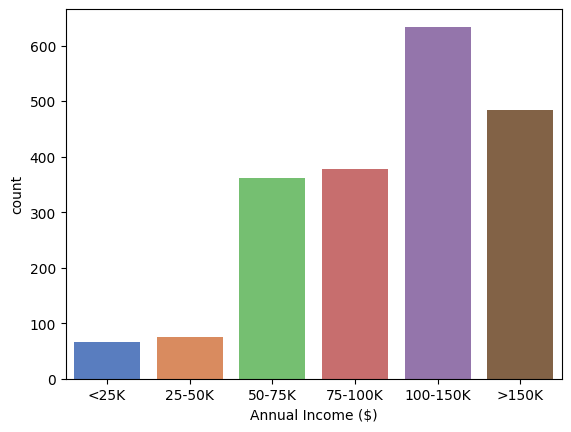

In [12]:
income_bins = [0, 25000, 50000, 75000, 100000, 150000, np.inf]
income_labels = ['<25K', '25-50K', '50-75K', '75-100K', '100-150K', '>150K']

income_count = pd.cut(df['Annual Income ($)'], bins=income_bins, labels=income_labels).value_counts()

sns.barplot(x=income_count.index,y=income_count,palette='muted')

plt.show()

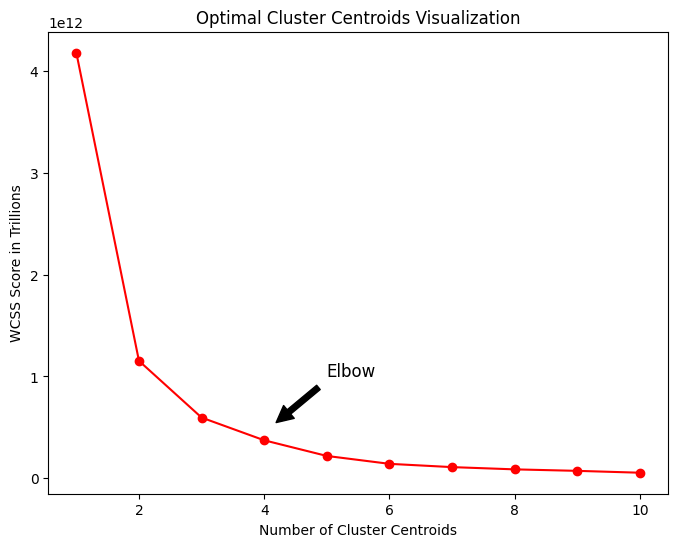

In [13]:
WCSS = []

for k in range(1,11):
        kmeans = KMeans(n_clusters = k,init='k-means++',n_init='auto')
        kmeans.fit(df.iloc[:,1:])
        WCSS.append(kmeans.inertia_)

fig = plt.figure(figsize=(8,6))

plt.plot(range(1,11),WCSS,marker='o',c='red')

plt.ylabel('WCSS Score in Trillions')

plt.xlabel('Number of Cluster Centroids')

plt.title('Optimal Cluster Centroids Visualization')

plt.annotate('Elbow', xy=(4.1, 1e12/2), xytext=(5, 1e12), fontsize=12,arrowprops=dict(facecolor='black',shrink=.1))
plt.show()
        

/Users/adenletchworth/Library/Python/3.8/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


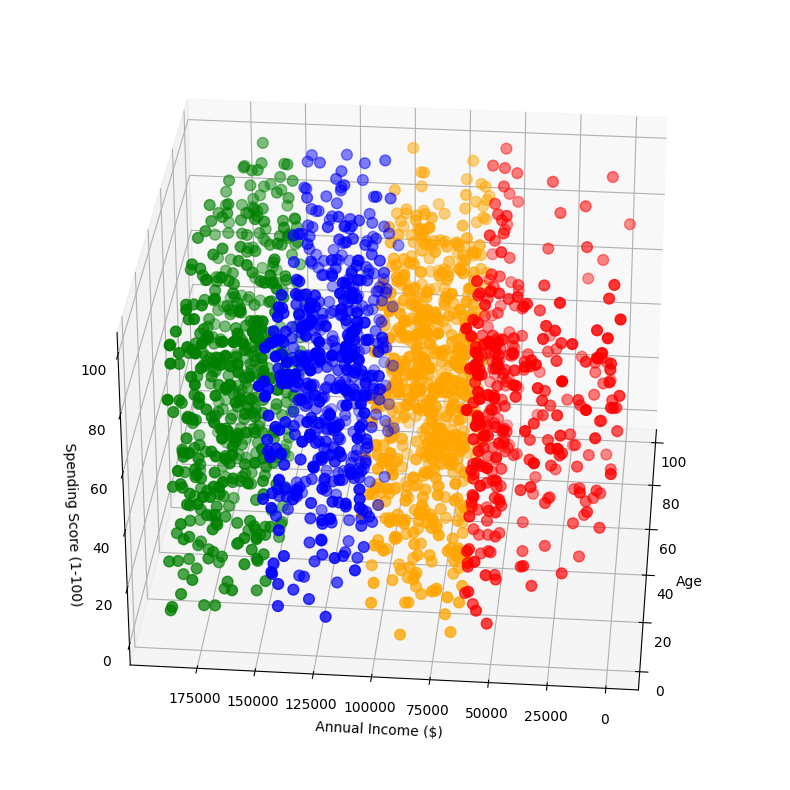

In [14]:
km = KMeans(n_clusters=4)
clusters = km.fit_predict(df.iloc[:,1:])

df['label'] = clusters

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.Age[df.label == 0], df["Annual Income ($)"][df.label == 0], df["Spending Score (1-100)"][df.label == 0], c='blue', s=60)
ax.scatter(df.Age[df.label == 1], df["Annual Income ($)"][df.label == 1], df["Spending Score (1-100)"][df.label == 1], c='red', s=60)
ax.scatter(df.Age[df.label == 2], df["Annual Income ($)"][df.label == 2], df["Spending Score (1-100)"][df.label == 2], c='green', s=60)
ax.scatter(df.Age[df.label == 3], df["Annual Income ($)"][df.label == 3], df["Spending Score (1-100)"][df.label == 3], c='orange', s=60)
ax.view_init(30, 185)
plt.xlabel("Age")
plt.ylabel("Annual Income ($)")
ax.set_zlabel('Spending Score (1-100)')

plt.savefig('customer.jpg')
plt.show()



